In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
X_train=pd.read_csv('X_train.csv')
X_valid=pd.read_csv('X_valid.csv')
X_test=pd.read_csv('X_test.csv')
y_train=np.load('y_train.npy')
y_valid=np.load('y_valid.npy')
y_test=np.load('y_test.npy')

In [7]:
y_test_deep=np.load('y_test_deep2_new.npy')

In [8]:
pred_LR=np.load('pred_LR_best.npy')
pred_SVM=np.load('pred_SVM.npy')
pred_NB=np.load('pred_NB.npy')
pred_DT=np.load('pred_DT.npy')
pred_GB=np.load('pred_GB.npy')
pred_bilstm=np.load('y_pred_deep2.npy')








### AOC-ROC curve

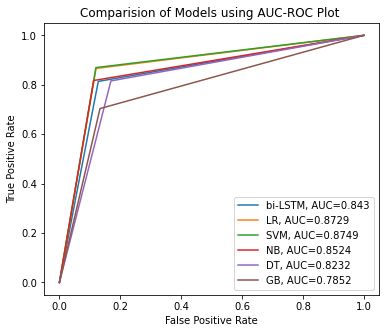

In [42]:
pred_list=[pred_bilstm,pred_LR,pred_SVM,pred_NB,pred_DT,pred_GB]
model_list=["bi-LSTM","LR","SVM","NB","DT","GB"]
auc_roc_list=[]
#model_roc_list=[LR_ROC,SVM_ROC,NB_ROC,DT_ROC,GB_ROC]



y_list=[y_test,y_test_deep]
plt.figure(0).clf()
for i in range(0,6):
    if i==0:
        fpr, tpr, _ = metrics.roc_curve(y_test_deep, pred_bilstm)
        auc = round(metrics.roc_auc_score(y_test_deep, pred_bilstm), 4)
        auc_roc_list.append(auc)
        plt.plot(fpr,tpr,label="{0}, AUC=".format(model_list[i])+str(auc))
        continue
        
        
    fpr, tpr, _ = metrics.roc_curve(y_test, pred_list[i])
    auc = round(metrics.roc_auc_score(y_test, pred_list[i]), 4)
    auc_roc_list.append(auc)
    plt.plot(fpr,tpr,label="{0}, AUC=".format(model_list[i])+str(auc))
plt.legend()
plt.title('Comparision of Models using AUC-ROC Plot ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.rcParams['figure.figsize'] = [6.4, 4.8]

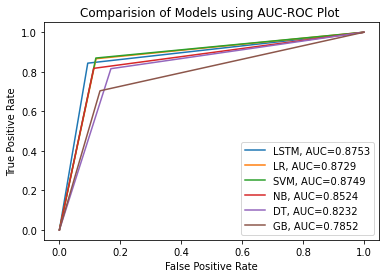

In [10]:
pred_list=[pred_bilstm,pred_LR,pred_SVM,pred_NB,pred_DT,pred_GB]
model_list=["LSTM","LR","SVM","NB","DT","GB"]
auc_roc_list=[]
#model_roc_list=[LR_ROC,SVM_ROC,NB_ROC,DT_ROC,GB_ROC]



y_list=[y_test,y_test_deep]
plt.figure(0).clf()
for i in range(0,6):
    if i==0:
        fpr, tpr, _ = metrics.roc_curve(y_test_deep, pred_bilstm)
        auc = round(metrics.roc_auc_score(y_test_deep, pred_bilstm), 4)
        auc_roc_list.append(auc)
        plt.plot(fpr,tpr,label="{0}, AUC=".format(model_list[i])+str(auc))
        continue
        
        
    fpr, tpr, _ = metrics.roc_curve(y_test, pred_list[i])
    auc = round(metrics.roc_auc_score(y_test, pred_list[i]), 4)
    auc_roc_list.append(auc)
    plt.plot(fpr,tpr,label="{0}, AUC=".format(model_list[i])+str(auc))
plt.legend()
plt.title('Comparision of Models using AUC-ROC Plot ')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.rcParams['figure.figsize'] = [6.4, 4.8]

### AOC-PR

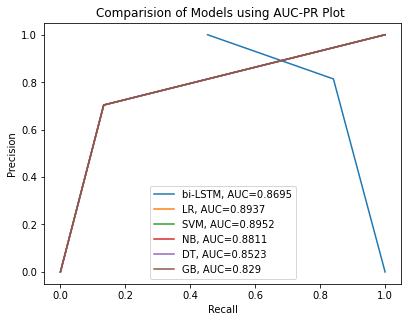

In [43]:
pred_list=[pred_bilstm,pred_LR,pred_SVM,pred_NB,pred_DT,pred_GB]
model_list=["bi-LSTM","LR","SVM","NB","DT","GB"]
auc_pr_list=[]
#model_roc_list=[LR_ROC,SVM_ROC,NB_ROC,DT_ROC,GB_ROC]



y_list=[y_test,y_test_deep]
plt.figure(0).clf()
for i in range(0,6):
    if i==0:
        precision, recall, _ = metrics.precision_recall_curve(y_test_deep, pred_bilstm)
        auc = round(metrics.auc(recall, precision), 4)
        auc_pr_list.append(auc)
        plt.plot(precision,recall,label="{0}, AUC=".format(model_list[i])+str(auc))
        continue
        
        
    precision, recall, _ = metrics.precision_recall_curve(y_test, pred_list[i])
    auc = round(metrics.auc(recall,precision), 4)
    auc_pr_list.append(auc)
    plt.plot(fpr,tpr,label="{0}, AUC=".format(model_list[i])+str(auc))
plt.legend()
plt.title('Comparision of Models using AUC-PR Plot ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.rcParams['figure.figsize'] = [6.4, 4.8]

### Accuracy Score Comparision


In [11]:
pred_list=[pred_bilstm,pred_LR,pred_SVM,pred_NB,pred_DT,pred_GB]
model_list=["LSTM","LR","SVM","NB","DT","GB"]
accuracy_list=[]
f1_list=[]
#model_roc_list=[LR_ROC,SVM_ROC,NB_ROC,DT_ROC,GB_ROC]



y_list=[y_test,y_test_deep]

for i in range(0,6):
    if i==0:
        accuracy= metrics.accuracy_score(y_test_deep, pred_bilstm)
        accuracy = round(accuracy, 4)
        f1_score=round(metrics.f1_score(y_test_deep,pred_bilstm),4)
        accuracy_list.append(accuracy)
        f1_list.append(f1_score)
        
        continue
        
        
    accuracy= metrics.accuracy_score(y_test, pred_list[i])
    accuracy = round(accuracy, 4)
    f1_score=round(metrics.f1_score(y_test,pred_list[i]),4)
    accuracy_list.append(accuracy)
    f1_list.append(f1_score)


In [12]:
accuracy_list

[0.8778, 0.8734, 0.8753, 0.8552, 0.8238, 0.7917]

In [13]:
f1_list

[0.8638, 0.8629, 0.8652, 0.8385, 0.8099, 0.7566]

In [14]:
score_df=pd.DataFrame()

In [15]:
score_df['models']=model_list
score_df['accuracy']=accuracy_list
score_df['f1-score']=f1_list

In [16]:
score_df.to_csv('score_df.csv',index=False)

<AxesSubplot:title={'center':'Comparision of Accuracy and F1 Scores for models '}, xlabel='models'>

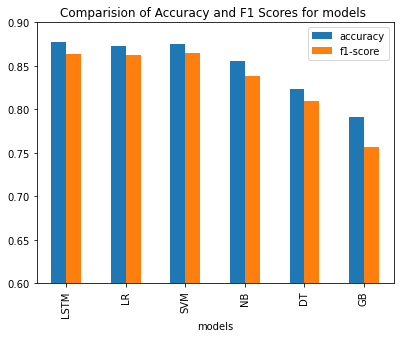

In [17]:

score_df.plot(x='models',
        kind='bar',
        stacked=False,
        title='Comparision of Accuracy and F1 Scores for models ',ylim=[0.6,0.9])
